# TR and sequence length by site

### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics
from collections import Counter

### Data preparation

In [87]:
params = pd.read_csv("/global/homes/p/pakmasha/ENIGMA-OCD results/Visualization/Parameters_all_sites.csv")
params.head()

,Site,Scanner type,Field strength (T),Structural voxel size (mm),Structural TR (ms),Structural TE (ms),Structural flip angle (degrees),Functional voxel size (mm),Functional TR (ms),Functional TE (ms),Functional flip angle (degrees),N Volumes,Study inclusion start date\n (YYYY-MM-DD),Study inclusion end date \n (YYYY-MM-DD; if available),DOI to published paper \n (if available)
0,Amsterdam_AMC,"Philips, Best",3.0,1.1 x 1.1 x 1.1,6.9,3.10,8.0,3.0 x 3.0 x 3.0,2375,9;26;44,76,200,2016-02-15,2018-08-13,10.1038/s41398-020-0744-7
1,Amsterdam_VUmc,GE Signa HDxt,3.0,1 ?? 0.977 ?? 0.977,NaN,NaN,NaN,3.3 ?? 3.3 x 3.0,1800,35,80,200,2008-01-01,2014-01-01,10.1080/15622975.2017.1353132
2,Barcelona_HCPB,TrioTim,3.0,1 x 0.9375 x 0.9375,2300.0,3.01,9.0,3 x 3 x 4,2000,29,80,240,2007-07-01,2013-06-30,-
3,Bergen,GE Discovery MR750,3.0,"2001, 1, 1",7.0,3.00,12.0,"3.44, 3.44, 3.3",1800,30,80,160,2015-08-24,2017-12-11,10.1016/j.bpsc.2020.01.007
4,Braga_UMinho/Braga_1.5T,Siemens Magnetom Avanto,1.5,1 x 1 x 1,2730.0,3.48,7.0,3.5 x 3.5 x 3.5,2000,30,90,180,2012-05-23,2017-04-07,10.1016/j.pscychresns.2019.06.008


In [88]:
# Create a TR (sec) column
params["Functional TR (sec)"] = params["Functional TR (ms)"] / 1000
print("TR in seconds:")
print(params["Functional TR (sec)"])

TR in seconds:
0     2.375
1     1.800
2     2.000
3     1.800
4     2.000
5     2.000
6     1.000
7     2.000
8     1.600
9     1.730
10    2.300
11    2.300
12    2.500
13    0.800
14    2.411
15    2.000
16    2.500
17    2.000
18    1.000
19    0.850
20    0.850
21    0.800
22    0.700
23    2.000
24    2.000
25    2.000
26    2.000
27    2.000
28    2.000
29    3.500
30    3.000
31    2.000
32    2.000
33    2.000
Name: Functional TR (sec), dtype: float64


In [89]:
print(f"Sequence length of the Bangalore_NIMHANS: {params.loc[params['Site'] == 'Bangalore_NIMHANS', 'N Volumes'].values[0]}")

# Check the sequence length for Bangalore_NIMHANS
seq_len_list = []
halfpipe_path = "/pscratch/sd/p/pakmasha/ENIGMA_unzip/Bangalore_NIMHANS/halfpipe"

for subject_folder in os.listdir(halfpipe_path):
    subject_path = os.path.join(halfpipe_path, subject_folder)

    # Navigate to the "func" folder inside the subject folder
    func_path = os.path.join(subject_path, "func")

    if os.path.exists(func_path):

        # Search for the desired TSV file
        for file_name in os.listdir(func_path):

            if "corrMatrix2_atlas-schaefer2011" in file_name and file_name.endswith("timeseries.tsv"):
                file_path = os.path.join(func_path, file_name)

                # Read the TSV file
                timeseries_data = pd.read_csv(file_path, sep="\t", header=None)
                seq_len_list.append(timeseries_data.shape[0])
                
print(f"Sequence length range for Bangalore_NIMHANS: {min(seq_len_list)}-{max(seq_len_list)}")
print(f"Mean sequence length for Bangalore_NIMHANS: {statistics.mean(seq_len_list)}")

Sequence length of the Bangalore_NIMHANS: 153-303
Sequence length range for Bangalore_NIMHANS: 20-306
Mean sequence length for Bangalore_NIMHANS: 176.4102564102564


In [90]:
# Check the sequence length distribution for Bangalore_NIMHANS
value_counts = Counter(seq_len_list)
print(f"Sequence length distribution for Bangalore_NIMHANS:")
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Sequence length distribution for Bangalore_NIMHANS:
Value: 153, Count: 389
Value: 303, Count: 72
Value: 152, Count: 1
Value: 72, Count: 1
Value: 306, Count: 2
Value: 150, Count: 1
Value: 221, Count: 1
Value: 20, Count: 1


In [91]:
# Adjust the sequence length for Bangalore_NIMHANS
params_edit = params
params_edit.loc[params_edit['Site'] == 'Bangalore_NIMHANS', 'N Volumes'] = 153
print(f"Adjusted sequence length of the Bangalore_NIMHANS: {params_edit.loc[params_edit['Site'] == 'Bangalore_NIMHANS', 'N Volumes'].values[0]}")

Adjusted sequence length of the Bangalore_NIMHANS: 153


In [92]:
# Check the data type of the "N Volumes" column
column_dtype = params_edit['N Volumes'].dtypes
print(f"Data type of 'N Volumes': {column_dtype}")

params_edit['N Volumes'] = params_edit['N Volumes'].astype(int)
column_dtype = params_edit['N Volumes'].dtypes
print(f"New data type of 'N Volumes': {column_dtype}")

Data type of 'N Volumes': object
New data type of 'N Volumes': int64


### Visualize all sites

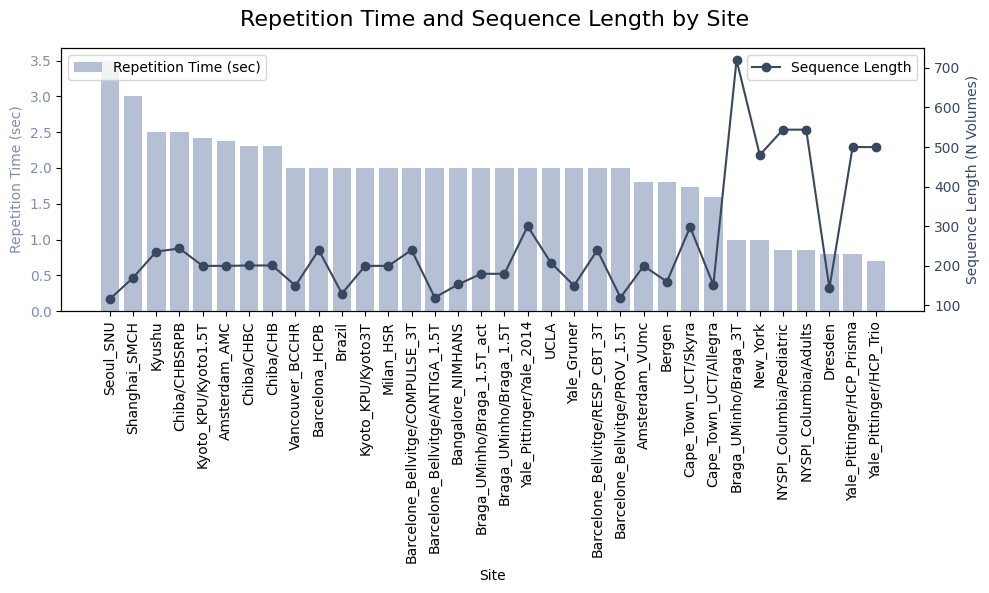

In [93]:
# Sort the DataFrame by "Functional TR (sec)" in descending order
params_sorted = params_edit.sort_values(by="Functional TR (sec)", ascending=False)

# Plot TR and sequence length
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for TR
ax1.bar(params_sorted["Site"], params_sorted["Functional TR (sec)"], color="#97A6C4", alpha=0.7, label="Repetition Time (sec)")
ax1.set_xlabel("Site")
ax1.set_ylabel("Repetition Time (sec)", color="#808EA8")
ax1.tick_params(axis="y", labelcolor="#808EA8")

# Rotate the x-axis labels 90 degrees
plt.xticks(rotation=90)

# Line plot for Sequence Length
ax2 = ax1.twinx()
ax2.plot(params_sorted["Site"], params_sorted["N Volumes"], color="#384860", marker="o", label="Sequence Length")
ax2.set_ylabel("Sequence Length (N Volumes)", color="#384860")
ax2.tick_params(axis="y", labelcolor="#384860")

# Title and Legend
fig.suptitle("Repetition Time and Sequence Length by Site", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("/global/homes/p/pakmasha/ENIGMA-OCD results/Visualization/TR_and_seq_len_by_site.png", dpi=600)

# Display the plot
plt.tight_layout()
plt.show()

### Visualize sites in the final dataset

In [94]:
# Read the meta-data
metadata = pd.read_csv("/global/homes/p/pakmasha/model/MBBN-main/data/metadata/ENIGMA_QC_final_subject_list.csv")
metadata.head()

,Sample,Subject ID,Formatted ID,Unique_ID,OCD,Age of onset,Medication,Y-BOCS,Age,Age range,...,Education,Depression current,Depression lifetime,Anxiety current,Anxiety lifetime,Agr_Check,Clean,Sex_Rel,Hoard,Ord
0,Amsterdam-VUmc,sub-916002,sub-916002,Amsterdam-VUmc_sub-916002,1,1.0,2.0,24.0,22.0,3,...,11.0,2.0,2.0,1.0,1,1.0,1.0,0.0,0.0,1.0
1,Amsterdam-VUmc,sub-916006,sub-916006,Amsterdam-VUmc_sub-916006,1,2.0,2.0,15.0,21.0,3,...,11.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN
2,Amsterdam-VUmc,sub-916007,sub-916007,Amsterdam-VUmc_sub-916007,2,NaN,2.0,NaN,28.0,3,...,11.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,Amsterdam-VUmc,sub-916008,sub-916008,Amsterdam-VUmc_sub-916008,1,1.0,2.0,29.0,35.0,3,...,11.0,2.0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.0
4,Amsterdam-VUmc,sub-916010,sub-916010,Amsterdam-VUmc_sub-916010,1,1.0,2.0,26.0,50.0,3,...,10.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0


In [95]:
metadata["Sample"] = metadata["Sample"].str.replace('-', '_')
print("Sites in the final dataset:")
print(metadata["Sample"].unique())

# Format the site names
sites_final = ['Amsterdam_VUmc', 'Bangalore_NIMHANS', 'Barcelona_HCPB',
               'Barcelone_Bellvitge/ANTIGA_1.5T', 'Barcelone_Bellvitge/PROV_1.5T',
               'Barcelone_Bellvitge/RESP_CBT_3T', 'Bergen', 'Braga_UMinho/Braga_1.5T',
               'Braga_UMinho/Braga_1.5T_act', 'Braga_UMinho/Braga_3T', 'Brazil',
               'Cape_Town_UCT/Skyra', 'Chiba/CHB', 'Chiba/CHBC', 'Chiba/CHBSRPB', 'Dresden',
               'Kyoto_KPU/Kyoto1.5T', 'Kyoto_KPU/Kyoto3T', 'New_York',
               'NYSPI_Columbia/Adults', 'NYSPI_Columbia/Pediatric', 'Seoul_SNU',
               'Shanghai_SMCH', 'UCLA', 'Vancouver_BCCHR', 'Yale_Gruner',
               'Yale_Pittinger/HCP_Prisma', 'Yale_Pittinger/HCP_Trio', 'Yale_Pittinger/Yale_2014']

Sites in the final dataset:
['Amsterdam_VUmc' 'Bangalore_NIMHANS' 'Barcelona_HCPB'
 'Barcelone_Bellvitge_ANTIGA_1.5T' 'Barcelone_Bellvitge_PROV_1.5T'
 'Barcelone_Bellvitge_RESP_CBT_3T' 'Bergen' 'Braga_UMinho_Braga_1.5T'
 'Braga_UMinho_Braga_1.5T_act' 'Braga_UMinho_Braga_3T' 'Brazil'
 'Cape_Town_UCT_Skyra' 'Chiba_CHB' 'Chiba_CHBC' 'Chiba_CHBSRPB' 'Dresden'
 'Kyoto_KPU_Kyoto1.5T' 'Kyoto_KPU_Kyoto3T' 'New_York'
 'NYSPI_Columbia_Adults' 'NYSPI_Columbia_Pediatric' 'Seoul_SNU'
 'Shanghai_SMCH' 'UCLA' 'Vancouver_BCCHR' 'Yale_Gruner'
 'Yale_Pittinger_HCP_Prisma' 'Yale_Pittinger_HCP_Trio'
 'Yale_Pittinger_Yale_2014']


In [96]:
print(params_edit['Site'])

# Filter the DataFrame based on whether 'Site' is in the sites_final array
filtered_params = params_edit[params_edit['Site'].isin(sites_final)]

# Display the filtered DataFrame
filtered_params.head()

0                       Amsterdam_AMC
1                      Amsterdam_VUmc
2                      Barcelona_HCPB
3                              Bergen
4             Braga_UMinho/Braga_1.5T
5         Braga_UMinho/Braga_1.5T_act
6               Braga_UMinho/Braga_3T
7                              Brazil
8               Cape_Town_UCT/Allegra
9                 Cape_Town_UCT/Skyra
10                          Chiba/CHB
11                         Chiba/CHBC
12                      Chiba/CHBSRPB
13                            Dresden
14                Kyoto_KPU/Kyoto1.5T
15                  Kyoto_KPU/Kyoto3T
16                             Kyushu
17                          Milan_HSR
18                           New_York
19              NYSPI_Columbia/Adults
20           NYSPI_Columbia/Pediatric
21          Yale_Pittinger/HCP_Prisma
22            Yale_Pittinger/HCP_Trio
23           Yale_Pittinger/Yale_2014
24                  Bangalore_NIMHANS
25    Barcelone_Bellvitge/ANTIGA_1.5T
26    Barcel

,Site,Scanner type,Field strength (T),Structural voxel size (mm),Structural TR (ms),Structural TE (ms),Structural flip angle (degrees),Functional voxel size (mm),Functional TR (ms),Functional TE (ms),Functional flip angle (degrees),N Volumes,Study inclusion start date\n (YYYY-MM-DD),Study inclusion end date \n (YYYY-MM-DD; if available),DOI to published paper \n (if available),Functional TR (sec)
1,Amsterdam_VUmc,GE Signa HDxt,3.0,1 ?? 0.977 ?? 0.977,NaN,NaN,NaN,3.3 ?? 3.3 x 3.0,1800,35,80,200,2008-01-01,2014-01-01,10.1080/15622975.2017.1353132,1.8
2,Barcelona_HCPB,TrioTim,3.0,1 x 0.9375 x 0.9375,2300.0,3.01,9.0,3 x 3 x 4,2000,29,80,240,2007-07-01,2013-06-30,-,2.0
3,Bergen,GE Discovery MR750,3.0,"2001, 1, 1",7.0,3.00,12.0,"3.44, 3.44, 3.3",1800,30,80,160,2015-08-24,2017-12-11,10.1016/j.bpsc.2020.01.007,1.8
4,Braga_UMinho/Braga_1.5T,Siemens Magnetom Avanto,1.5,1 x 1 x 1,2730.0,3.48,7.0,3.5 x 3.5 x 3.5,2000,30,90,180,2012-05-23,2017-04-07,10.1016/j.pscychresns.2019.06.008,2.0
5,Braga_UMinho/Braga_1.5T_act,Siemens Magnetom Avanto,1.5,1 x 1 x 1,2730.0,3.48,7.0,3.5 x 3.5 x 3.5,2000,30,90,180,2012-05-23,2017-04-07,10.1016/j.pscychresns.2019.06.008,2.0


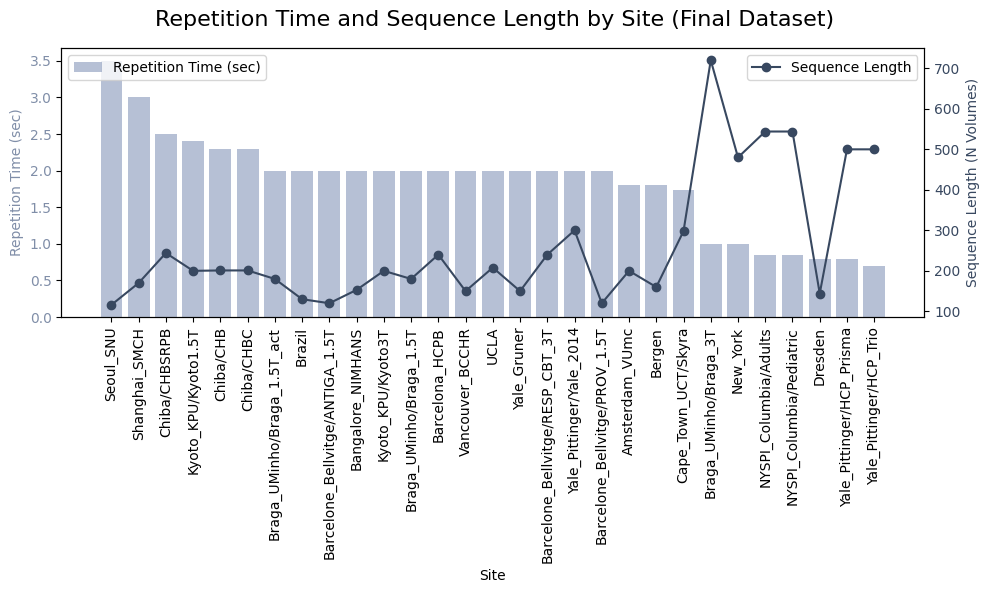

In [98]:
# Sort the DataFrame by "Functional TR (sec)" in descending order
params_sorted = filtered_params.sort_values(by="Functional TR (sec)", ascending=False)

# Plot TR and sequence length
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for TR
ax1.bar(params_sorted["Site"], params_sorted["Functional TR (sec)"], color="#97A6C4", alpha=0.7, label="Repetition Time (sec)")
ax1.set_xlabel("Site")
ax1.set_ylabel("Repetition Time (sec)", color="#808EA8")
ax1.tick_params(axis="y", labelcolor="#808EA8")

# Rotate the x-axis labels 90 degrees
plt.xticks(rotation=90)

# Line plot for Sequence Length
ax2 = ax1.twinx()
ax2.plot(params_sorted["Site"], params_sorted["N Volumes"], color="#384860", marker="o", label="Sequence Length")
ax2.set_ylabel("Sequence Length (N Volumes)", color="#384860")
ax2.tick_params(axis="y", labelcolor="#384860")

# Title and Legend
fig.suptitle("Repetition Time and Sequence Length by Site (Final Dataset)", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("/global/homes/p/pakmasha/ENIGMA-OCD results/Visualization/TR_and_seq_len_by_site_final_dataset.png", dpi=600)

# Display the plot
plt.tight_layout()
plt.show()

# Performance and sample size by sequence length

In [5]:
data = pd.read_csv("/global/homes/p/pakmasha/ENIGMA-OCD results/Visualization/Performance_by_sequence_length_results.csv")
data.head()

,Sequence length,Sample size,% of the dataset,Mean test AUROC,Epoch #,# of unique sites
0,80,NaN,0,NaN,NaN,NaN
1,100,1645.0,79,0.63,74.0,28.0
2,148,1125.0,54,0.66,110.0,23.0
3,200,693.0,33,0.79,117.0,13.0
4,248,498.0,24,0.64,99.0,10.0


In [6]:
# Remove the first row
data = data.drop(index=0)
data.head()

,Sequence length,Sample size,% of the dataset,Mean test AUROC,Epoch #,# of unique sites
1,100,1645.0,79,0.63,74.0,28.0
2,148,1125.0,54,0.66,110.0,23.0
3,200,693.0,33,0.79,117.0,13.0
4,248,498.0,24,0.64,99.0,10.0
5,300,344.0,16,0.69,119.0,7.0


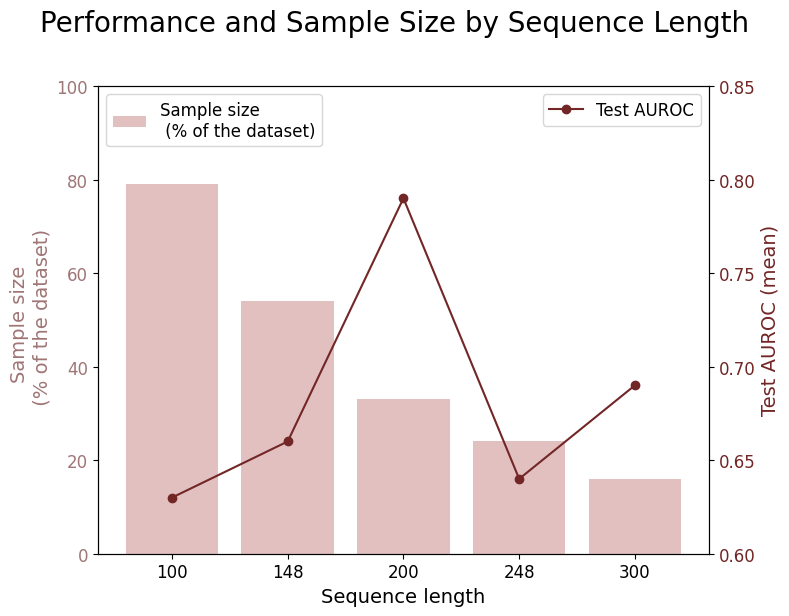

In [22]:
# Adjust font sizes
plt.rcParams.update({
    "axes.titlesize": 18,        # Title size
    "axes.labelsize": 14,        # Axis label size
    "xtick.labelsize": 12,       # X-tick label size
    "ytick.labelsize": 12,       # Y-tick label size
    "legend.fontsize": 12,       # Legend font size
})

# Convert the "Sequence length" column to strings to use as x-axis values
data["Sequence length"] = data["Sequence length"].astype(str)

# Plot TR and sequence length
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for TR
ax1.bar(data["Sequence length"], data["% of the dataset"], color="#d8a6a6", alpha=0.7, label="Sample size \n (% of the dataset)")
ax1.set_xlabel("Sequence length")
ax1.set_ylabel("Sample size \n (% of the dataset)", color="#9F7575")
ax1.tick_params(axis="y", labelcolor="#9F7575")

# Set y-axis limits
ax1.set_ylim(0, 100) 

# Line plot for Sequence Length
ax2 = ax1.twinx()
ax2.plot(data["Sequence length"], data["Mean test AUROC"], color="#722626", marker="o", label="Test AUROC")
ax2.set_ylabel("Test AUROC (mean)", color="#722626")
ax2.tick_params(axis="y", labelcolor="#722626")

# Set y-axis limits
ax2.set_ylim(0.60, 0.85) 

# Title and Legend
fig.suptitle("Performance and Sample Size by Sequence Length", fontsize = 20, y=1.02)  # Adjust y for spacing
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("/global/homes/p/pakmasha/ENIGMA-OCD results/Visualization/Performance_and_sample_size_by_seq_len.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()
